Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed_2019.pkl")

In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Would_live_in_another_neighborhood,District,Woman,Car,Support_with_housework,Owner,House_size,No_of_people_in_the_house,Financial_situation,Disability,...,CIRCULATION AND TRAFFIC,BUS,CITIZEN SECURITY IN THE CITY AS A WHOLE,CITY MANAGEMENT,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,SANTS - MONTJUÏC,0,1,0.0,1.0,51-100 M2,TWO,GOOD,0.0,...,1.0,1.0,0.0,1,0,0,0,0,0,0
1,0.0,SANTS - MONTJUÏC,1,0,0.0,1.0,51-100 M2,ONE,BAD,0.0,...,0.0,1.0,1.0,0,1,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,0,1.0,0.0,51-100 M2,ONE,GOOD,0.0,...,0.0,1.0,0.0,0,0,0,0,1,0,0
3,1.0,SANTS - MONTJUÏC,0,0,0.0,1.0,< 50 M2,TWO,BAD,1.0,...,0.0,1.0,0.0,0,0,0,1,0,0,0
4,0.0,SANTS - MONTJUÏC,1,0,1.0,1.0,51-100 M2,TWO,GOOD,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0


In [6]:
data.shape

(1169, 46)

In [7]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'House_size',
 'No_of_people_in_the_house',
 'Financial_situation',
 'Disability',
 'Living_with_disabled_person',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'Residential_satisfaction',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITY MANAGEMENT',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_

In [8]:
x_var = ['District',
 'Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'House_size',
 'No_of_people_in_the_house',
 'Financial_situation',
 'Disability',
 'Living_with_disabled_person',
 'BCN_evolution',
 'BCN_future',
 'Barri_association',
 'BCN_transport',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITY MANAGEMENT']

In [9]:
y = data['Residential_satisfaction']

In [10]:
x = pd.get_dummies(data[x_var])

In [11]:
x.columns.tolist()

['Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'Disability',
 'Living_with_disabled_person',
 'Barri_association',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITY MANAGEMENT',
 'District_CIUTAT VELLA',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'House_size_101-150 M2',
 'House_size_51-100 M2',
 'House_size_< 50 M2',
 'House_size_> 150 M2',
 "House_size_I DON'T KNOW",
 'No_of_people_in_the_house_ONE',
 'No_of_people_in_the_house_THREE OR MORE',
 'No_of_people_in_the_house_TWO',
 'Financial_situation_BAD',
 'Financial_situation_GOOD',
 'BCN_evolution_IT HAS IMPROVED',
 'BCN_evolution_IT HAS WORSENED',
 'BCN_evolution_IT IS THE SA

In [12]:
for i in ['District_EIXAMPLE',
  'House_size_< 50 M2',
  'No_of_people_in_the_house_ONE',
 'Financial_situation_BAD',
  'BCN_evolution_IT HAS WORSENED',
  'BCN_future_IT WILL WORSEN',
 'BCN_transport_BAD']:
    del x[i]

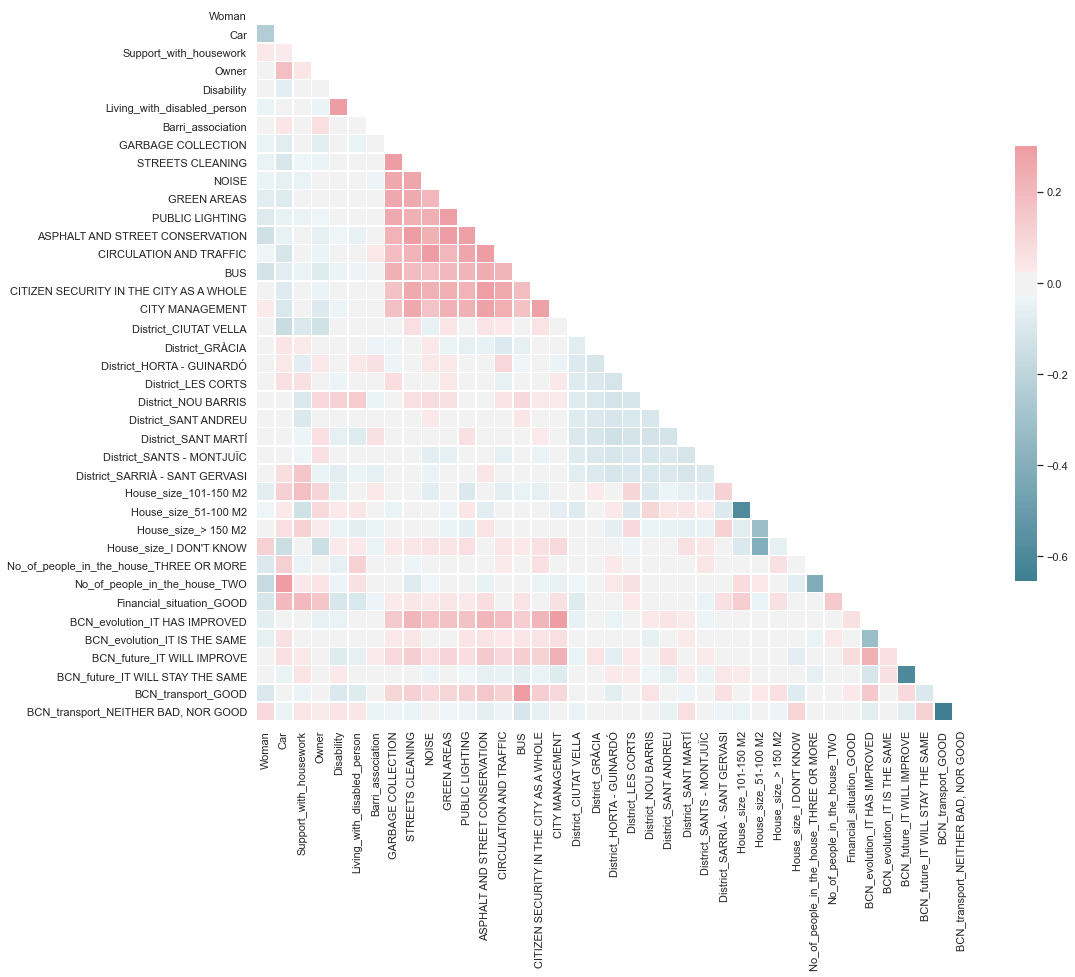

In [13]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = x.corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, #annot = corr.round(2), 
            linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
x = sm.add_constant(x)

# Logit

In [15]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1129
Model Family:                      Binomial   Df Model:                           39
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -371.40
Date:                      Mon, 10 May 2021   Deviance:                       742.80
Time:                              21:48:05   Pearson chi2:                 1.19e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.7866      0.669      1.175      0.240      -0.525       2.099
Woman                                       0.3813      0.211      1.808      0.071      -0.032       0.795
Car                                        -0.3621      0.235     -1.541      0.123      -0.823       0.098
Support_with_housework                      0.1553      0.225      0.691      0.489      -0.285       0.595
Owner                                       0.3319      0.266      1.248      0.212      -0.189       0.853
Disability                                 -0.0984      0.349     -0.282      0.778      -0.782       0.585
Living_with_disabled_person                -0.1011      0.293     -0.345      0.730      -0.675       0.473
Barri_association                           0.1230      0.244      0.505      0.614      -0.355       0.601
GARBAGE COLLECTION                          0.5202      0.234      2.220      0.026       0.061       0.980
STREETS CLEANING                            0.1180      0.239      0.493      0.622      -0.351       0.587
NOISE                                       0.0320      0.225      0.142      0.887      -0.408       0.472
GREEN AREAS                                 0.2122      0.219      0.969      0.333      -0.217       0.641
PUBLIC LIGHTING                            -0.0471      0.214     -0.220      0.826      -0.467       0.373
ASPHALT AND STREET CONSERVATION             0.5727      0.255      2.246      0.025       0.073       1.072
CIRCULATION AND TRAFFIC                    -0.1968      0.250     -0.788      0.431      -0.687       0.293
BUS                                        -0.0628      0.223     -0.281      0.779      -0.501       0.375
CITIZEN SECURITY IN THE CITY AS A WHOLE    -0.0138      0.270     -0.051      0.959      -0.543       0.516
CITY MANAGEMENT                             0.6071      0.263      2.310      0.021       0.092       1.122
District_CIUTAT VELLA                      -1.0898      0.444     -2.455      0.014      -1.960      -0.220
District_GRÀCIA                            -0.7630      0.402     -1.900      0.057      -1.550       0.024
District_HORTA - GUINARDÓ                  -0.2270      0.393     -0.578      0.564      -0.997       0.543
District_LES CORTS                         -0.3386      0.432     -0.784      0.433      -1.185       0.507
District_NOU BARRIS                        -0.5714      0.407     -1.403      0.161      -1.370       0.227
District_SANT ANDREU                       -0.3595      0.434     -0.829      0.407      -1.210       0.491
District_SANT MARTÍ                        -0.1284      0.405     -0.317      0.751      -0.922      

In [16]:
glm_logit_results.aic

822.797885564924

In [17]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7232.349686937041

In [18]:
glm_logit_results.pvalues.sort_values(ascending=False)

CITIZEN SECURITY IN THE CITY AS A WHOLE    9.592508e-01
Financial_situation_GOOD                   9.232035e-01
BCN_transport_NEITHER BAD, NOR GOOD        9.105452e-01
NOISE                                      8.867277e-01
PUBLIC LIGHTING                            8.261036e-01
BUS                                        7.785348e-01
Disability                                 7.777877e-01
District_SANT MARTÍ                        7.512018e-01
District_SARRIÀ - SANT GERVASI             7.308700e-01
Living_with_disabled_person                7.297491e-01
No_of_people_in_the_house_TWO              6.788884e-01
House_size_I DON'T KNOW                    6.441352e-01
STREETS CLEANING                           6.219847e-01
Barri_association                          6.138311e-01
BCN_transport_GOOD                         6.038129e-01
District_HORTA - GUINARDÓ                  5.635081e-01
Support_with_housework                     4.893070e-01
District_LES CORTS                         4.327

In [19]:
for i in ["CITIZEN SECURITY IN THE CITY AS A WHOLE",
          "Financial_situation_GOOD",
          "BCN_transport_NEITHER BAD, NOR GOOD", "BCN_transport_GOOD",
          "NOISE", 
          "PUBLIC LIGHTING", 
          "BUS",
          "Disability",
          "Living_with_disabled_person",
         "STREETS CLEANING",
          "Barri_association"]:
    del x[i]

In [20]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1140
Model Family:                      Binomial   Df Model:                           28
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -372.30
Date:                      Mon, 10 May 2021   Deviance:                       744.60
Time:                              21:48:07   Pearson chi2:                 1.19e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.7819      0.613      1.276      0.202      -0.419       1.983
Woman                                       0.3778      0.208      1.815      0.070      -0.030       0.786
Car                                        -0.3519      0.233     -1.512      0.131      -0.808       0.104
Support_with_housework                      0.1410      0.220      0.640      0.522      -0.291       0.573
Owner                                       0.3640      0.260      1.400      0.161      -0.146       0.874
GARBAGE COLLECTION                          0.5739      0.208      2.755      0.006       0.166       0.982
GREEN AREAS                                 0.2055      0.212      0.968      0.333      -0.211       0.622
ASPHALT AND STREET CONSERVATION             0.5973      0.244      2.452      0.014       0.120       1.075
CIRCULATION AND TRAFFIC                    -0.2041      0.242     -0.844      0.399      -0.678       0.270
CITY MANAGEMENT                             0.6288      0.259      2.423      0.015       0.120       1.137
District_CIUTAT VELLA                      -1.0733      0.440     -2.439      0.015      -1.936      -0.211
District_GRÀCIA                            -0.7578      0.397     -1.910      0.056      -1.536       0.020
District_HORTA - GUINARDÓ                  -0.2465      0.389     -0.634      0.526      -1.008       0.515
District_LES CORTS                         -0.3396      0.429     -0.792      0.428      -1.180       0.501
District_NOU BARRIS                        -0.6019      0.399     -1.507      0.132      -1.384       0.181
District_SANT ANDREU                       -0.3875      0.428     -0.905      0.366      -1.227       0.452
District_SANT MARTÍ                        -0.1140      0.402     -0.283      0.777      -0.902       0.674
District_SANTS - MONTJUÏC                  -0.6973      0.400     -1.744      0.081      -1.481       0.086
District_SARRIÀ - SANT GERVASI             -0.1330      0.438     -0.304      0.761      -0.992       0.726
House_size_101-150 M2                      -0.6087      0.559     -1.089      0.276      -1.704       0.487
House_size_51-100 M2                       -0.4713      0.493     -0.956      0.339      -1.438       0.495
House_size_> 150 M2                        -0.6585      0.690     -0.954      0.340      -2.011       0.694
House_size_I DON'T KNOW                    -0.2863      0.640     -0.448      0.654      -1.540       0.967
No_of_people_in_the_house_THREE OR MORE    -0.3078      0.315     -0.978      0.328      -0.924       0.309
No_of_people_in_the_house_TWO              -0.1216      0.246     -0.494      0.621      -0.604      

In [21]:
glm_logit_results.aic

802.6002079300702

In [22]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7308.250308148088

In [23]:
glm_logit_results.pvalues.sort_values(ascending=False)

District_SANT MARTÍ                        7.769407e-01
District_SARRIÀ - SANT GERVASI             7.614293e-01
House_size_I DON'T KNOW                    6.544909e-01
No_of_people_in_the_house_TWO              6.211597e-01
District_HORTA - GUINARDÓ                  5.259700e-01
Support_with_housework                     5.220505e-01
District_LES CORTS                         4.284042e-01
CIRCULATION AND TRAFFIC                    3.989381e-01
District_SANT ANDREU                       3.656722e-01
House_size_> 150 M2                        3.398494e-01
House_size_51-100 M2                       3.390077e-01
GREEN AREAS                                3.332627e-01
No_of_people_in_the_house_THREE OR MORE    3.278564e-01
House_size_101-150 M2                      2.760599e-01
const                                      2.019986e-01
Owner                                      1.614931e-01
District_NOU BARRIS                        1.317243e-01
Car                                        1.305

In [24]:
for i in x.columns.tolist():
    if i[:8] == 'District':
        del x[i]

In [25]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1149
Model Family:                      Binomial   Df Model:                           19
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -377.51
Date:                      Mon, 10 May 2021   Deviance:                       755.01
Time:                              21:48:09   Pearson chi2:                 1.21e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1587      0.544      0.292      0.771      -0.908       1.225
Woman                                       0.3956      0.206      1.920      0.055      -0.008       0.799
Car                                        -0.2667      0.224     -1.190      0.234      -0.706       0.173
Support_with_housework                      0.2496      0.211      1.182      0.237      -0.164       0.663
Owner                                       0.3900      0.247      1.582      0.114      -0.093       0.873
GARBAGE COLLECTION                          0.5518      0.206      2.675      0.007       0.147       0.956
GREEN AREAS                                 0.1888      0.210      0.898      0.369      -0.223       0.601
ASPHALT AND STREET CONSERVATION             0.5709      0.240      2.376      0.018       0.100       1.042
CIRCULATION AND TRAFFIC                    -0.1643      0.235     -0.700      0.484      -0.624       0.296
CITY MANAGEMENT                             0.5830      0.259      2.254      0.024       0.076       1.090
House_size_101-150 M2                      -0.4254      0.546     -0.779      0.436      -1.495       0.645
House_size_51-100 M2                       -0.3054      0.479     -0.638      0.524      -1.244       0.633
House_size_> 150 M2                        -0.4806      0.674     -0.713      0.476      -1.802       0.841
House_size_I DON'T KNOW                    -0.1003      0.627     -0.160      0.873      -1.329       1.129
No_of_people_in_the_house_THREE OR MORE    -0.3527      0.309     -1.140      0.254      -0.959       0.254
No_of_people_in_the_house_TWO              -0.1721      0.242     -0.711      0.477      -0.647       0.302
BCN_evolution_IT HAS IMPROVED               0.8797      0.321      2.741      0.006       0.251       1.509
BCN_evolution_IT IS THE SAME                0.7388      0.272      2.719      0.007       0.206       1.271
BCN_future_IT WILL IMPROVE                  1.2487      0.230      5.424      0.000       0.798       1.700
BCN_future_IT WILL STAY THE SAME            0.6103      0.238      2.561      0.010       0.143       1.077
===========================================================================================================
"""

In [26]:
glm_logit_results.aic

795.013781057183

In [27]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7361.411870674223

In [28]:
glm_logit_results.pvalues.sort_values(ascending=False)

House_size_I DON'T KNOW                    8.729428e-01
const                                      7.705453e-01
House_size_51-100 M2                       5.237231e-01
CIRCULATION AND TRAFFIC                    4.837595e-01
No_of_people_in_the_house_TWO              4.770659e-01
House_size_> 150 M2                        4.759677e-01
House_size_101-150 M2                      4.358733e-01
GREEN AREAS                                3.689380e-01
No_of_people_in_the_house_THREE OR MORE    2.541561e-01
Support_with_housework                     2.370614e-01
Car                                        2.342000e-01
Owner                                      1.136721e-01
Woman                                      5.490377e-02
CITY MANAGEMENT                            2.418297e-02
ASPHALT AND STREET CONSERVATION            1.751297e-02
BCN_future_IT WILL STAY THE SAME           1.043698e-02
GARBAGE COLLECTION                         7.474732e-03
BCN_evolution_IT IS THE SAME               6.555

In [29]:
for i in x.columns.tolist():
    if i[:5] == 'House':
        del x[i]

In [30]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1153
Model Family:                      Binomial   Df Model:                           15
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -377.98
Date:                      Mon, 10 May 2021   Deviance:                       755.97
Time:                              21:48:10   Pearson chi2:                 1.21e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0749      0.372     -0.201      0.841      -0.804       0.654
Woman                                       0.4012      0.204      1.965      0.049       0.001       0.801
Car                                        -0.2875      0.223     -1.291      0.197      -0.724       0.149
Support_with_housework                      0.2199      0.205      1.072      0.284      -0.182       0.622
Owner                                       0.3467      0.242      1.435      0.151      -0.127       0.820
GARBAGE COLLECTION                          0.5464      0.206      2.655      0.008       0.143       0.950
GREEN AREAS                                 0.1978      0.209      0.945      0.345      -0.212       0.608
ASPHALT AND STREET CONSERVATION             0.5705      0.239      2.386      0.017       0.102       1.039
CIRCULATION AND TRAFFIC                    -0.1574      0.234     -0.674      0.501      -0.615       0.301
CITY MANAGEMENT                             0.5975      0.257      2.322      0.020       0.093       1.102
No_of_people_in_the_house_THREE OR MORE    -0.3758      0.307     -1.226      0.220      -0.977       0.225
No_of_people_in_the_house_TWO              -0.1856      0.241     -0.772      0.440      -0.657       0.286
BCN_evolution_IT HAS IMPROVED               0.8774      0.320      2.740      0.006       0.250       1.505
BCN_evolution_IT IS THE SAME                0.7354      0.271      2.711      0.007       0.204       1.267
BCN_future_IT WILL IMPROVE                  1.2372      0.229      5.410      0.000       0.789       1.686
BCN_future_IT WILL STAY THE SAME            0.5977      0.237      2.518      0.012       0.133       1.063
===========================================================================================================
"""

In [31]:
glm_logit_results.aic

787.9663588236922

In [32]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7388.714908753602

In [33]:
glm_logit_results.pvalues.sort_values(ascending=False)

const                                      8.405718e-01
CIRCULATION AND TRAFFIC                    5.005274e-01
No_of_people_in_the_house_TWO              4.402279e-01
GREEN AREAS                                3.446993e-01
Support_with_housework                     2.838945e-01
No_of_people_in_the_house_THREE OR MORE    2.203488e-01
Car                                        1.967533e-01
Owner                                      1.513937e-01
Woman                                      4.938199e-02
CITY MANAGEMENT                            2.023511e-02
ASPHALT AND STREET CONSERVATION            1.701808e-02
BCN_future_IT WILL STAY THE SAME           1.178627e-02
GARBAGE COLLECTION                         7.938504e-03
BCN_evolution_IT IS THE SAME               6.708003e-03
BCN_evolution_IT HAS IMPROVED              6.140364e-03
BCN_future_IT WILL IMPROVE                 6.311932e-08
dtype: float64

In [34]:
for i in x.columns.tolist():
    if i[:5] == 'No_of':
        del x[i]

In [35]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1155
Model Family:                      Binomial   Df Model:                           13
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -378.73
Date:                      Mon, 10 May 2021   Deviance:                       757.47
Time:                              21:48:12   Pearson chi2:                 1.22e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.2299      0.342     -0.673      0.501      -0.899       0.440
Woman                                0.4439      0.201      2.208      0.027       0.050       0.838
Car                                 -0.3641      0.208     -1.747      0.081      -0.773       0.044
Support_with_housework               0.2259      0.205      1.103      0.270      -0.176       0.627
Owner                                0.3584      0.241      1.489      0.136      -0.113       0.830
GARBAGE COLLECTION                   0.5471      0.205      2.666      0.008       0.145       0.949
GREEN AREAS                          0.2041      0.209      0.976      0.329      -0.206       0.614
ASPHALT AND STREET CONSERVATION      0.5840      0.238      2.454      0.014       0.118       1.050
CIRCULATION AND TRAFFIC             -0.1708      0.233     -0.732      0.464      -0.628       0.286
CITY MANAGEMENT                      0.5898      0.257      2.297      0.022       0.087       1.093
BCN_evolution_IT HAS IMPROVED        0.8954      0.320      2.800      0.005       0.269       1.522
BCN_evolution_IT IS THE SAME         0.7548      0.271      2.789      0.005       0.224       1.285
BCN_future_IT WILL IMPROVE           1.2313      0.228      5.392      0.000       0.784       1.679
BCN_future_IT WILL STAY THE SAME     0.5974      0.237      2.525      0.012       0.134       1.061
====================================================================================================
"""

In [36]:
glm_logit_results.aic

785.469018504969

In [37]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7401.34005699527

In [38]:
glm_logit_results.pvalues.sort_values(ascending=False)

const                               5.009352e-01
CIRCULATION AND TRAFFIC             4.640093e-01
GREEN AREAS                         3.288698e-01
Support_with_housework              2.701933e-01
Owner                               1.363859e-01
Car                                 8.066333e-02
Woman                               2.722912e-02
CITY MANAGEMENT                     2.161422e-02
ASPHALT AND STREET CONSERVATION     1.413569e-02
BCN_future_IT WILL STAY THE SAME    1.156896e-02
GARBAGE COLLECTION                  7.687206e-03
BCN_evolution_IT IS THE SAME        5.292589e-03
BCN_evolution_IT HAS IMPROVED       5.102940e-03
BCN_future_IT WILL IMPROVE          6.974700e-08
dtype: float64

In [39]:
for i in ['CIRCULATION AND TRAFFIC', 'GREEN AREAS', 'Support_with_housework', 'Owner']:
    del x[i]

In [40]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1159
Model Family:                      Binomial   Df Model:                            9
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -381.09
Date:                      Mon, 10 May 2021   Deviance:                       762.17
Time:                              21:48:14   Pearson chi2:                 1.19e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.1175      0.282      0.416      0.677      -0.436       0.671
Woman                                0.4368      0.200      2.182      0.029       0.044       0.829
Car                                 -0.2871      0.202     -1.424      0.155      -0.682       0.108
GARBAGE COLLECTION                   0.5378      0.199      2.700      0.007       0.147       0.928
ASPHALT AND STREET CONSERVATION      0.5710      0.227      2.516      0.012       0.126       1.016
CITY MANAGEMENT                      0.5837      0.253      2.310      0.021       0.088       1.079
BCN_evolution_IT HAS IMPROVED        0.8710      0.317      2.744      0.006       0.249       1.493
BCN_evolution_IT IS THE SAME         0.7323      0.270      2.716      0.007       0.204       1.261
BCN_future_IT WILL IMPROVE           1.2618      0.227      5.558      0.000       0.817       1.707
BCN_future_IT WILL STAY THE SAME     0.6481      0.234      2.766      0.006       0.189       1.107
====================================================================================================
"""

In [41]:
glm_logit_results.aic

782.1718097631767

In [42]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7424.89288158295

In [43]:
glm_logit_results.pvalues.sort_values(ascending=False)

const                               6.772048e-01
Car                                 1.545768e-01
Woman                               2.910608e-02
CITY MANAGEMENT                     2.089098e-02
ASPHALT AND STREET CONSERVATION     1.186863e-02
GARBAGE COLLECTION                  6.942045e-03
BCN_evolution_IT IS THE SAME        6.608162e-03
BCN_evolution_IT HAS IMPROVED       6.072731e-03
BCN_future_IT WILL STAY THE SAME    5.669355e-03
BCN_future_IT WILL IMPROVE          2.727900e-08
dtype: float64

In [44]:
for i in ['Car']:
    del x[i]

In [45]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1160
Model Family:                      Binomial   Df Model:                            8
Link Function:                        logit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -382.11
Date:                      Mon, 10 May 2021   Deviance:                       764.22
Time:                              21:48:16   Pearson chi2:                 1.20e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.1141      0.231     -0.495      0.621      -0.566       0.338
Woman                                0.5098      0.194      2.632      0.008       0.130       0.889
GARBAGE COLLECTION                   0.5683      0.198      2.874      0.004       0.181       0.956
ASPHALT AND STREET CONSERVATION      0.5874      0.227      2.593      0.010       0.143       1.031
CITY MANAGEMENT                      0.6224      0.251      2.482      0.013       0.131       1.114
BCN_evolution_IT HAS IMPROVED        0.8746      0.317      2.763      0.006       0.254       1.495
BCN_evolution_IT IS THE SAME         0.7169      0.269      2.666      0.008       0.190       1.244
BCN_future_IT WILL IMPROVE           1.2393      0.226      5.489      0.000       0.797       1.682
BCN_future_IT WILL STAY THE SAME     0.6501      0.234      2.781      0.005       0.192       1.108
====================================================================================================
"""

In [46]:
glm_logit_results.aic

782.2164169564903

In [47]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7429.912178351108

In [48]:
glm_logit_results.pvalues.sort_values(ascending=False)

const                               6.205130e-01
CITY MANAGEMENT                     1.305948e-02
ASPHALT AND STREET CONSERVATION     9.503128e-03
Woman                               8.485393e-03
BCN_evolution_IT IS THE SAME        7.675970e-03
BCN_evolution_IT HAS IMPROVED       5.727471e-03
BCN_future_IT WILL STAY THE SAME    5.411460e-03
GARBAGE COLLECTION                  4.059032e-03
BCN_future_IT WILL IMPROVE          4.043848e-08
dtype: float64

In [49]:
def odds_ratios(results):
    return np.exp(results.params)

In [50]:
odds_ratios(glm_logit_results)

const                               0.892142
Woman                               1.664950
GARBAGE COLLECTION                  1.765315
ASPHALT AND STREET CONSERVATION     1.799321
CITY MANAGEMENT                     1.863400
BCN_evolution_IT HAS IMPROVED       2.397873
BCN_evolution_IT IS THE SAME        2.048007
BCN_future_IT WILL IMPROVE          3.453330
BCN_future_IT WILL STAY THE SAME    1.915766
dtype: float64

In [51]:
def classification_table(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Residential_satisfaction': 'y', 0: 'y_predict'}, inplace=True)
    return pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])

In [52]:
def plot_roc_auc(results):
    y_predict = results.predict(x)
    roc_auc = roc_auc_score(y, y_predict)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [53]:
# https://github.com/statsmodels/statsmodels/issues/5861
def pseudo_r2(results):
    return print("Pseudo R2:", (1 - results.llf / results.llnull))

In [54]:
def adj_count_r2(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Residential_satisfaction': 'y', 0: 'y_predict'}, inplace=True)
    df = pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])
    return print("Adj Count R2:", round((df[0][0] + df[1][1] - (df[0][0]+df[1][0]))/(df[0][1]+df[1][1]),3))

In [55]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0,8,141
1,9,1011


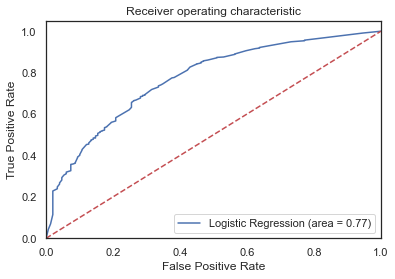

In [56]:
plot_roc_auc(glm_logit_results)

In [57]:
pseudo_r2(glm_logit_results)

Pseudo R2: 0.14326794468520387


In [58]:
adj_count_r2(glm_logit_results)

Adj Count R2: 0.853


# Probit

In [59]:
glm_probit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.probit))
glm_probit_results = glm_probit.fit()
glm_probit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1160
Model Family:                      Binomial   Df Model:                            8
Link Function:                       probit   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -382.83
Date:                      Mon, 10 May 2021   Deviance:                       765.65
Time:                              22:09:13   Pearson chi2:                 1.24e+03
No. Iterations:                           6                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0151      0.133      0.114      0.909      -0.245       0.275
Woman                                0.2662      0.105      2.533      0.011       0.060       0.472
GARBAGE COLLECTION                   0.3232      0.109      2.954      0.003       0.109       0.538
ASPHALT AND STREET CONSERVATION      0.2949      0.117      2.522      0.012       0.066       0.524
CITY MANAGEMENT                      0.3043      0.126      2.419      0.016       0.058       0.551
BCN_evolution_IT HAS IMPROVED        0.4432      0.155      2.856      0.004       0.139       0.747
BCN_evolution_IT IS THE SAME         0.3761      0.139      2.700      0.007       0.103       0.649
BCN_future_IT WILL IMPROVE           0.6690      0.122      5.501      0.000       0.431       0.907
BCN_future_IT WILL STAY THE SAME     0.3671      0.132      2.791      0.005       0.109       0.625
====================================================================================================
"""

In [60]:
glm_probit_results.aic

783.6542884523521

In [61]:
glm_probit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7428.474306855246

In [62]:
odds_ratios(glm_probit_results)

const                               1.015208
Woman                               1.304987
GARBAGE COLLECTION                  1.381560
ASPHALT AND STREET CONSERVATION     1.342981
CITY MANAGEMENT                     1.355671
BCN_evolution_IT HAS IMPROVED       1.557682
BCN_evolution_IT IS THE SAME        1.456612
BCN_future_IT WILL IMPROVE          1.952262
BCN_future_IT WILL STAY THE SAME    1.443586
dtype: float64

In [63]:
classification_table(glm_probit_results)

y_predict,1.0
y,
0,149
1,1020


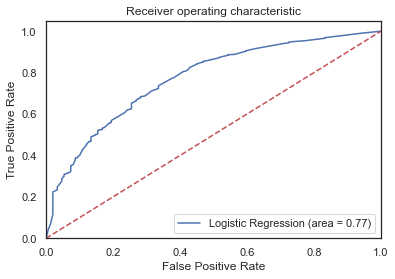

In [64]:
plot_roc_auc(glm_probit_results)

In [65]:
pseudo_r2(glm_probit_results)

Pseudo R2: 0.141656005220681


In [66]:
adj_count_r2(glm_probit_results)

KeyError: 0.0

# Scobit

In [67]:
glm_scobit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.cloglog))
glm_scobit_results = glm_scobit.fit()
glm_scobit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                     
====================================================================================
Dep. Variable:     Residential_satisfaction   No. Observations:                 1169
Model:                                  GLM   Df Residuals:                     1160
Model Family:                      Binomial   Df Model:                            8
Link Function:                      cloglog   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -384.26
Date:                      Mon, 10 May 2021   Deviance:                       768.52
Time:                              22:09:24   Pearson chi2:                 1.29e+03
No. Iterations:                           7                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.1978      0.120     -1.650      0.099      -0.433       0.037
Woman                                0.1992      0.085      2.339      0.019       0.032       0.366
GARBAGE COLLECTION                   0.2725      0.092      2.968      0.003       0.093       0.452
ASPHALT AND STREET CONSERVATION      0.2133      0.090      2.375      0.018       0.037       0.389
CITY MANAGEMENT                      0.2187      0.094      2.315      0.021       0.034       0.404
BCN_evolution_IT HAS IMPROVED        0.3342      0.114      2.928      0.003       0.111       0.558
BCN_evolution_IT IS THE SAME         0.2896      0.107      2.699      0.007       0.079       0.500
BCN_future_IT WILL IMPROVE           0.5423      0.101      5.345      0.000       0.343       0.741
BCN_future_IT WILL STAY THE SAME     0.3142      0.113      2.773      0.006       0.092       0.536
====================================================================================================
"""

In [68]:
glm_scobit_results.aic

786.5156511751957

In [69]:
glm_scobit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7425.612944132403

In [70]:
odds_ratios(glm_scobit_results)

const                               0.820519
Woman                               1.220396
GARBAGE COLLECTION                  1.313255
ASPHALT AND STREET CONSERVATION     1.237813
CITY MANAGEMENT                     1.244416
BCN_evolution_IT HAS IMPROVED       1.396804
BCN_evolution_IT IS THE SAME        1.335956
BCN_future_IT WILL IMPROVE          1.720009
BCN_future_IT WILL STAY THE SAME    1.369143
dtype: float64

In [71]:
classification_table(glm_scobit_results)

y_predict,1.0
y,
0,149
1,1020


In [ ]:
plot_roc_auc(glm_scobit_results)

In [ ]:
pseudo_r2(glm_scobit_results)

In [ ]:
adj_count_r2(glm_scobit_results)